In [1]:
from google.colab import drive
drive.mount('/gdrive/')
%cd /gdrive

Mounted at /gdrive/
/gdrive


In [2]:
ls

MyDrive/


In [3]:
 cd/gdrive/MyDrive/Document_Classification/

/gdrive/MyDrive/Document_Classification


In [4]:
ls

data.csv                       text-document-classification-clustering.ipynb
document-classification.ipynb  text-document-classification.ipynb


In [5]:
import numpy as np
import pandas as pd
import os

## Import Libraries

In [6]:
!pip install unidecode

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 2.7 MB/s eta 0:00:00


In [7]:
!pip install contractions

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 12.5 MB/s eta 0:00:00


In [11]:
! pip install pytesseract

In [13]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 6.4 MB/s eta 0:00:00


In [8]:
# !unzip /usr/share/nltk_data/corpora/wordnet.zip -d /usr/share/nltk_data/corpora/

unzip:  cannot find or open /usr/share/nltk_data/corpora/wordnet.zip, /usr/share/nltk_data/corpora/wordnet.zip.zip or /usr/share/nltk_data/corpora/wordnet.zip.ZIP.


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

#----------SKLEARN--------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV,RandomizedSearchCV


from sklearn.cluster import KMeans , AgglomerativeClustering, DBSCAN
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer,ClusteringScoreVisualizer
from sklearn.metrics import silhouette_score


#-------NLTK--------------
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from string import punctuation
from unidecode import unidecode
from contractions import fix
from nltk.util import ngrams

from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from nltk.stem import LancasterStemmer, WordNetLemmatizer
from wordcloud import WordCloud

#-------TENSORFLOW---------
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Input, SimpleRNN, LSTM , GRU, Bidirectional, Embedding
from keras.layers import Dropout

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from keras.utils import to_categorical

import warnings
warnings.filterwarnings('ignore')

from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns

import pytesseract
import re

from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.svm import SVC

from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier


## Load Data

In [15]:
df = pd.read_csv("data.csv")
df

,Text,Label
0,Budget to set scene for election\n \n Gordon B...,0
1,Army chiefs in regiments decision\n \n Militar...,0
2,Howard denies split over ID cards\n \n Michael...,0
3,Observers to monitor UK election\n \n Minister...,0
4,Kilroy names election seat target\n \n Ex-chat...,0
...,...,...
2220,India opens skies to competition\n \n India wi...,4
2221,Yukos bankruptcy 'not US matter'\n \n Russian ...,4
2222,Survey confirms property slowdown\n \n Governm...,4
2223,High fuel prices hit BA's profits\n \n British...,4


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    2225 non-null   object
 1   Label   2225 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 34.9+ KB


In [17]:
df.columns

Index(['Text', 'Label'], dtype='object')

In [18]:
df['Text']

0       Budget to set scene for election\n \n Gordon B...
1       Army chiefs in regiments decision\n \n Militar...
2       Howard denies split over ID cards\n \n Michael...
3       Observers to monitor UK election\n \n Minister...
4       Kilroy names election seat target\n \n Ex-chat...
                              ...                        
2220    India opens skies to competition\n \n India wi...
2221    Yukos bankruptcy 'not US matter'\n \n Russian ...
2222    Survey confirms property slowdown\n \n Governm...
2223    High fuel prices hit BA's profits\n \n British...
2224    US trade gap hits record in 2004\n \n The gap ...
Name: Text, Length: 2225, dtype: object

In [19]:
df['Text'][0]

'Budget to set scene for election\n \n Gordon Brown will seek to put the economy at the centre of Labour\'s bid for a third term in power when he delivers his ninth Budget at 1230 GMT. He is expected to stress the importance of continued economic stability, with low unemployment and interest rates. The chancellor is expected to freeze petrol duty and raise the stamp duty threshold from Â£60,000. But the Conservatives and Lib Dems insist voters face higher taxes and more means-testing under Labour.\n \n Treasury officials have said there will not be a pre-election giveaway, but Mr Brown is thought to have about Â£2bn to spare.\n \n - Increase in the stamp duty threshold from Â£60,000 \n  - A freeze on petrol duty \n  - An extension of tax credit scheme for poorer families \n  - Possible help for pensioners The stamp duty threshold rise is intended to help first time buyers - a likely theme of all three of the main parties\' general election manifestos. Ten years ago, buyers had a much g

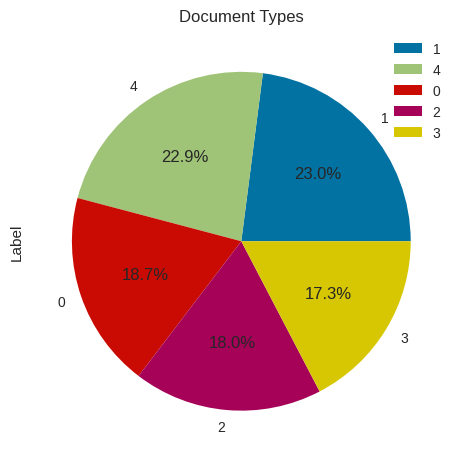

In [20]:
df['Label'].value_counts().plot(kind="pie",autopct="%.1f%%")
plt.title("Document Types")
plt.legend()
plt.show()

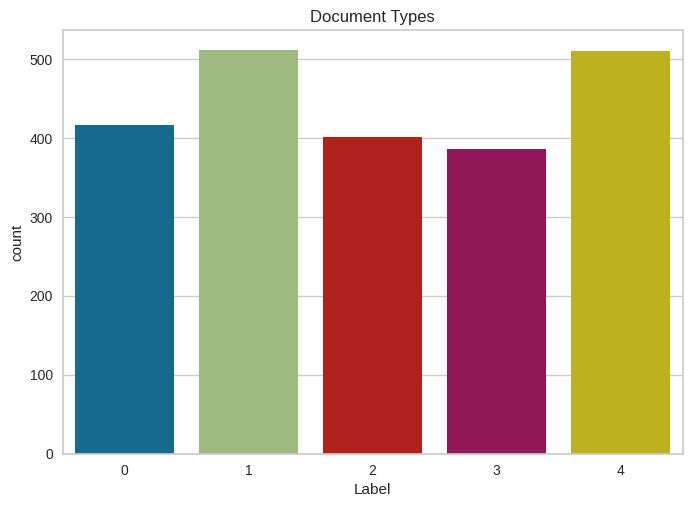

In [21]:
sns.countplot(x=df['Label'])
plt.title("Document Types")
plt.show()

## Data Preprocessing

In [29]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [24]:
import re
stopwords_list = stopwords.words("english")

def preprocess_data(text):
    text = text.lower()
    text = text.replace("\n"," ").replace("\t"," ")
    text = re.sub("\s+"," ",text)
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'[^\w\s]', '', text)

    # tokens
    tokens = word_tokenize(text)

    data = [i for i in tokens if i not in punctuation]
    data = [i for i in data if i not in stopwords_list]

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    final_text = []
    for i in data:
        word = lemmatizer.lemmatize(i)
        final_text.append(word)

    return " ".join(final_text)


In [30]:
clean_data = df['Text'].apply(preprocess_data)
clean_data

0       budget set scene election gordon brown seek pu...
1       army chief regiment decision military chief ex...
2       howard denies split id card michael howard den...
3       observer monitor uk election minister invite i...
4       kilroy name election seat target exchat show h...
                              ...                        
2220    india open sky competition india allow domesti...
2221    yukos bankruptcy u matter russian authority ab...
2222    survey confirms property slowdown government f...
2223    high fuel price hit ba profit british airway b...
2224    u trade gap hit record gap u export import hit...
Name: Text, Length: 2225, dtype: object

## TFIDF

In [31]:
tfidf = TfidfVectorizer(ngram_range=(1,5),max_df=0.95, max_features=15000)
tfidf_train = tfidf.fit_transform(clean_data)

In [32]:
tfidf_train.A.shape

(2225, 15000)

In [33]:
tfidf_train.A

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.04795698,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

## Kmeans Model

In [34]:
inertia_list = []
for k in range(1,12):
    model = KMeans(n_clusters=k)
    model.fit(tfidf_train)
    inertia_list.append(model.inertia_)

In [35]:
inertia_list

[2168.456686022862,
 2149.4597963899782,
 2133.51925823969,
 2119.8591606511145,
 2108.1065562234576,
 2098.7791062717497,
 2091.1440073625836,
 2082.086812286053,
 2075.9702712037224,
 2068.894633971664,
 2060.9819273122903]

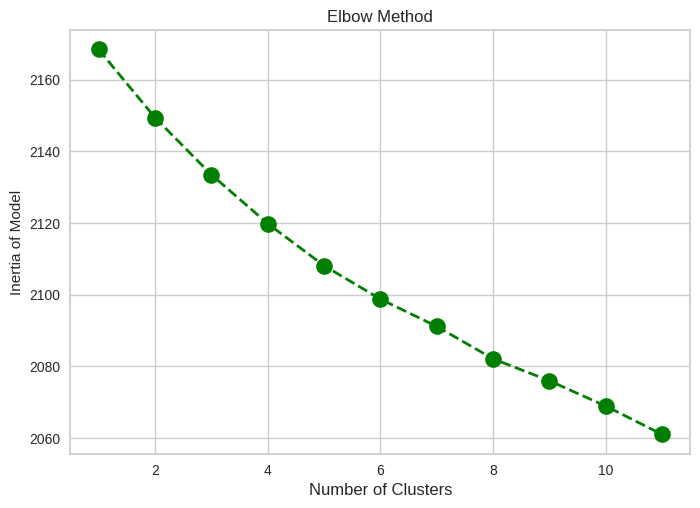

In [36]:
plt.plot(range(1,12) , inertia_list, color='green', marker='o', linestyle='dashed',linewidth=2, markersize=12)
plt.title("Elbow Method",fontsize=12)
plt.xlabel("Number of Clusters",fontsize=12)
plt.ylabel("Inertia of Model")
plt.show()

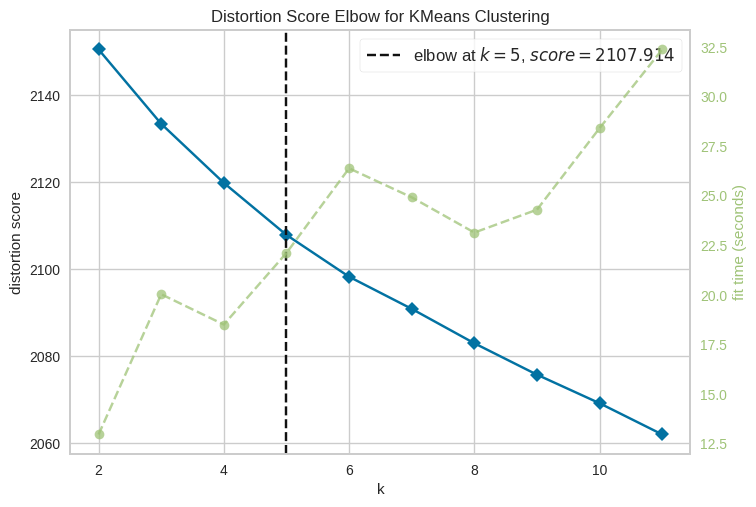

In [37]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2,12))  # metric='distortion'
visualizer.fit(tfidf_train.A)
visualizer.show()
plt.show()

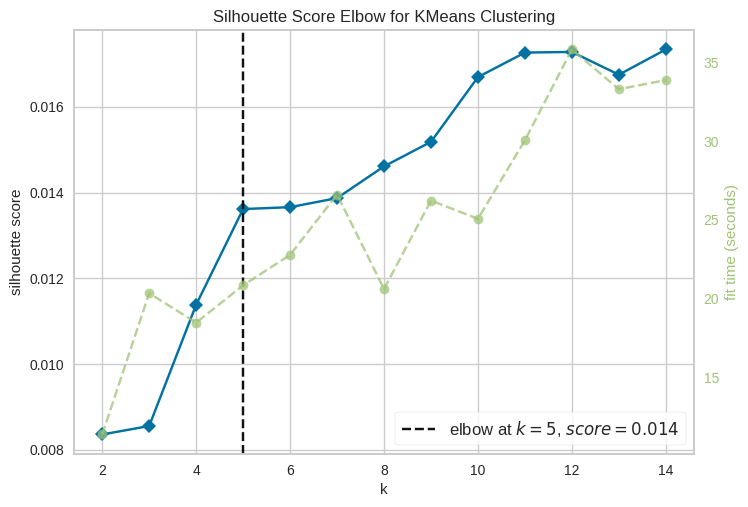

In [38]:
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2,15),metric="silhouette")
visualizer.fit(tfidf_train.A)
visualizer.show()
plt.show()

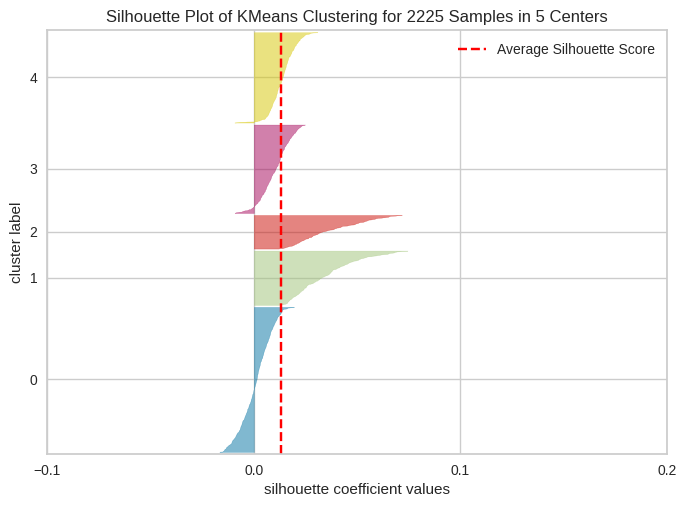

In [39]:
from yellowbrick.cluster import SilhouetteVisualizer

model = KMeans(n_clusters=5)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
visualizer.fit(tfidf_train.A)
visualizer.show()
plt.show()